<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figures/banner_sdc.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Basic of image manipulation </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figures/presentacion.png" align="middle" style="width:550px;"/></td>
<td>

**OpenCV** is a free library originally developed by Intel. It saw the light of day in 1999. Originally written in C/C++, its best virtue is that it is cross-platform, it can run on different operating systems (Linux, Windows, Mac OS X, Android and iOS). It can also be used in different programming languages such as Java, Objective C, C# and **Python**.

It is perhaps the most important and most widely used computer vision library. It is used by universities, companies and people in the Maker movement to give free rein to their imagination as it is free software.

In this notebook we will start with image processing in Python using this library, more specifically we will see how to load or read an image, conversion to black and white, filters and other operations that will be useful in the course.

   
<br>
</td>
</tr>
</table>

# Basic libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

plt.style.use('seaborn-paper')
plt.rc('font', family='serif')

# Part 1

## 1. Read/load an image

In [2]:
img = cv.imread('data/hello_world.png')

### "Hello world!“ in **`OpenCV`**: The official way

Like everything else in the programming world, it starts with the traditional **`"Hello world!"`** and the official way is:
```Python
import cv2 as cv

img = cv.imread('data/hello_world.png')
cv.imshow("Hello world!", img)
cv.waitKey(0)
cv.destroyAllWindows
```
(This code block is located in the **`hello_world_opencv.py`** file)

### "Hello world!“ in **`OpenCV`**: Jupyter Notebooks

The **`OpenCV`** library stores images in the **BGR** (Blue, Green, Red) channel, so we are going to change this _colour space_ to another one, the most used is **RGB** (Red, Green, Blue) to achieve this we use the following

In [3]:
img = cv.cvtColor( src = img, code = cv.COLOR_BGR2RGB )

Where **`src`** and **``code``** are parameters. These mean the object or image and the code of the channel change (in our case it is **RGB** $\to$ **RGB**), respectively:

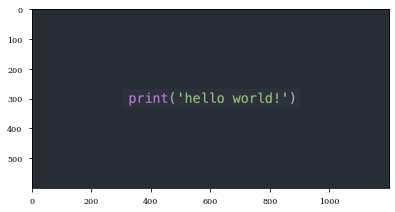

In [4]:
plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')
plt.imshow(img)

**Note:** If the `cv.cvtColor( src = IMG, code = cv.COLOR_BGR2RGB)` command is not used, the image would look as follows:

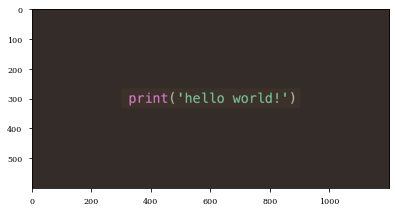

In [5]:
img = cv.imread('data/hello_world.png')
plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')
plt.imshow(img)

## 2. Convertion to greyscale

To change to greyscale, we use again the command **`cv.cvtColor()`** with the difference in **`code = cv.COLOR_BGR2GRAY`** .

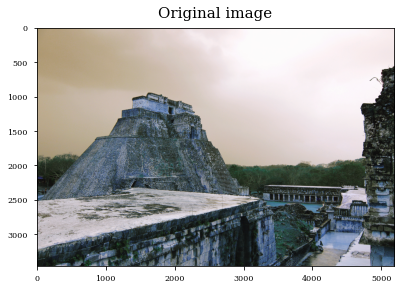

In [6]:
img = cv.imread('data/uxmal.jpg')

plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')
plt.title('Original image', size = 15, pad = 10)
plt.imshow(img)

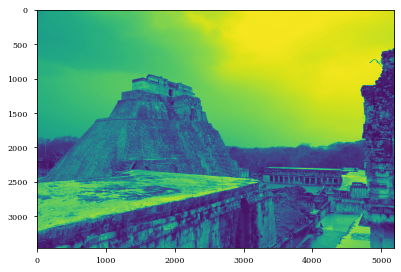

In [7]:
#convert the color
img_gray = cv.cvtColor(src = img, code = cv.COLOR_BGR2GRAY)

#display the image
plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')
plt.imshow(img_gray)

We can realise that simply using the **`plt.imshow()`** command is not enough. Recall that an image is an array of pixels:

In [8]:
img_gray

array([[135, 135, 137, ..., 235, 235, 234],
       [136, 136, 136, ..., 235, 234, 234],
       [136, 136, 136, ..., 234, 234, 233],
       ...,
       [ 21,  20,  19, ...,  81,  82,  81],
       [ 20,  20,  19, ...,  79,  82,  83],
       [ 20,  20,  19, ...,  75,  79,  80]], dtype=uint8)

Our greyscale image is an array of numbers between 0 and 255, so it has no other channels. In order to see it in greyscale we will have to add a **`colormap`** or **`cmap`** . This command is ignored when you have images with RGB channels:

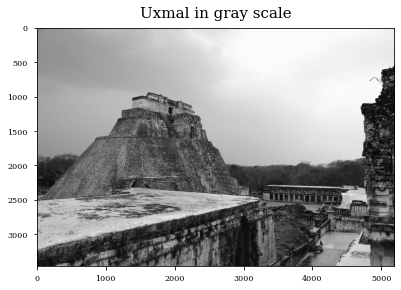

In [9]:
plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')

plt.title('Uxmal in gray scale', size = 15, pad = 10)
plt.imshow(img_gray, cmap = 'gray' )

This can be applied with any other [_colormap_](https://matplotlib.org/tutorials/colors/colormaps.html) :

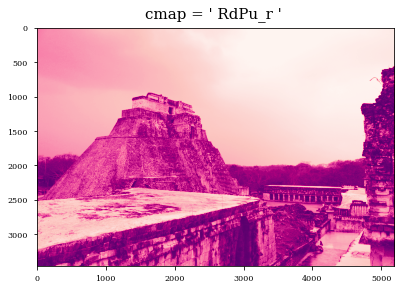

In [10]:
plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')

plt.title('cmap = \' RdPu_r \' ', size = 15, pad = 10)
plt.imshow(img_gray, cmap = 'RdPu_r' )

## 3. Image manipulation

In this section we will change parts of our image:

### Changing the colour of a section of the image

* New color: **(239, 134, 143)**
* Section of the _array_ : **[ :500, :3000, : ]**

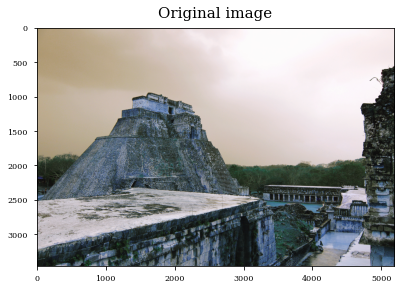

In [11]:
plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')

plt.title('Original image', size = 15, pad = 10)

plt.imshow(img)

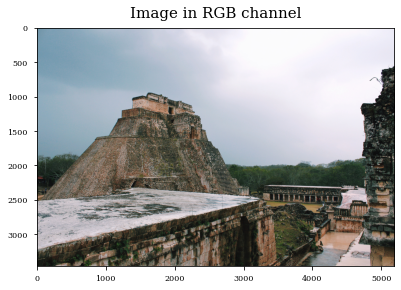

In [12]:
img_rgb = cv.cvtColor( src = img, code = cv.COLOR_BGR2RGB )

plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')
plt.title('Image in RGB channel', size = 15, pad = 10)
plt.imshow(img_rgb)

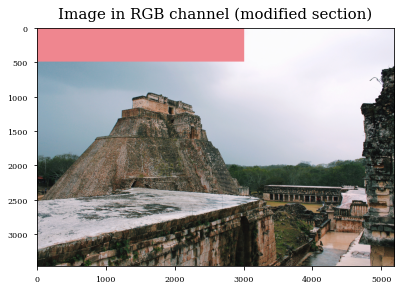

In [13]:
img_rgb[ :500, :3000, : ] = [239, 134, 143]

plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')
plt.title('Image in RGB channel (modified section)',
          size = 15,
          pad = 10
         )
plt.imshow(img_rgb)

### Image section

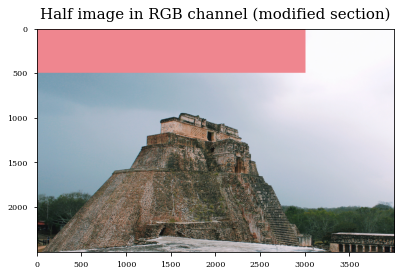

In [14]:
half_img = img_rgb[ :2500, :4000, : ]

plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')
plt.title('Half image in RGB channel (modified section)',
          size = 15,
          pad = 10
         )
plt.imshow(half_img)

## 4. Filters

Inside **`OpenCV`** we have different filters, the most common are:
* `cv.blur()`
* `cv.medianBlur()`
* `cv.GaussianBlur()`

In [15]:
img_meanBlur = cv.blur( src = img_gray,
                       ksize = (10,10) #kernel size
                      )
img_medianBlur = cv.medianBlur( img_gray,
                               ksize = 23 #kernel size
                              )
img_gaussianBlur = cv.GaussianBlur( src = img_gray,
                                   ksize = (7,7), #kernel size
                                   sigmaX = 1, #standar deviation 𝜎x
                                   sigmaY = 1 #standar deviation 𝜎y
                                  )

### Example: Median filter

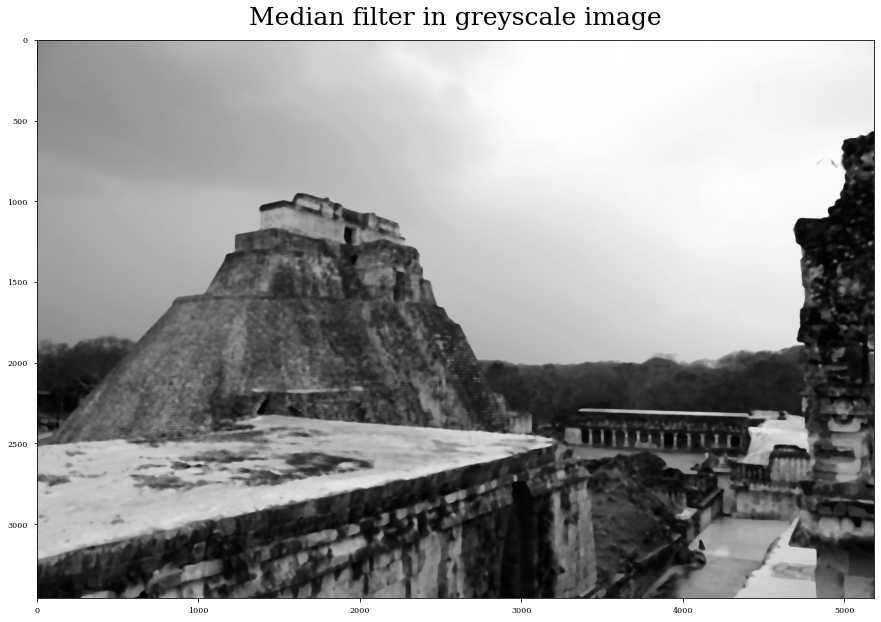

In [16]:
plt.figure(figsize= (15, 25), facecolor = '#FFFFFF')
plt.axes().set_facecolor('#FFFFFF')
plt.title('Median filter in greyscale image',
          size = 25,
          pad = 15
         )
plt.imshow(img_medianBlur, cmap = 'gray')

## 5. Thresholding 

Este método nos ayuda a "binarizar" las imágenes a nuestra conveniencia ya que le damos un límite, por ejemplo:

_Si el pixel vale 150 o menos, entonces cambia su valor a 0. Pero si el pixel es mayor a 150 entonces su valor aumenta a 255_

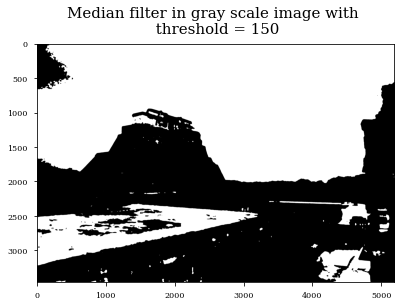

In [17]:
#using img_medianBlur
thr, img_thr = cv.threshold( img_medianBlur,
                            150, #Threshold
                            255, #maxval
                            cv.THRESH_BINARY #type of threshold
                           )

plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')

plt.title('Median filter in gray scale image with \n threshold = 150',
          size = 15,
          pad = 10
         )
plt.imshow(img_thr, cmap= 'gray')

## 6. Resize o cambio de tamaño

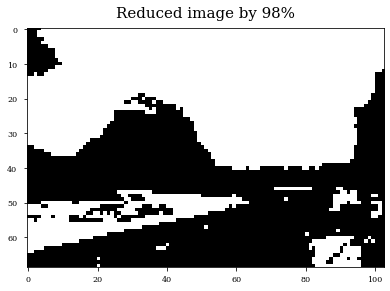

In [18]:
#reduction of the dimension by 98%
ratio = 0.02
height, width = img.shape[0], img.shape[1]

img_r = cv.resize( img_thr, 
                  ( int(width*ratio), int(height*ratio) ), #new dimensions
                  interpolation = cv.INTER_NEAREST
                 )

plt.figure( facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')
plt.title ( 'Reduced image by 98%', size = 15, pad = 10)
plt.imshow(img_r, cmap = 'gray')


## 7. Combination of all _operations_

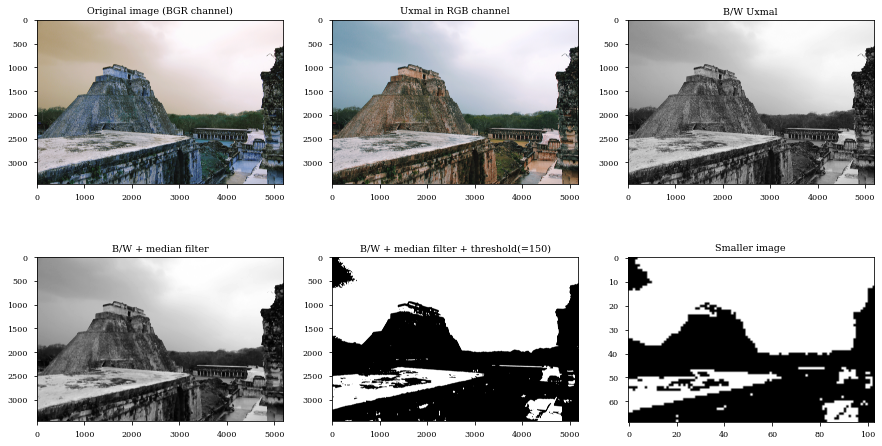

In [19]:
#read/load image
img = cv.imread('data/uxmal.jpg')

#change BGR -> RGB
img_rgb = cv.cvtColor( img,cv.COLOR_BGR2RGB)

#gray scale convertion
img_gray = cv.cvtColor( img,
                       code = cv.COLOR_BGR2GRAY
                      )

#median filter
img_medianBlur = cv.medianBlur( img_gray,
                               ksize = 23
                              )

#applying threshold
thr, img_thr = cv.threshold( img_medianBlur,
                            150,
                            255,
                            cv.THRESH_BINARY
                           )

#resize image
ratio = 0.02
alto, ancho, canales = img.shape

img_r = cv.resize( img_thr,
                  ( int(ancho*ratio), int(alto*ratio) ),
                  interpolation = cv.INTER_NEAREST
                 )

#plot the results
plt.figure( figsize = (15, 8), facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')

#original image
plt.subplot( 2, 3 , 1 )
plt.title( 'Original image (BGR channel)')
plt.imshow(img)

#RGB image
plt.subplot( 2, 3 , 2 )
plt.title( 'Uxmal in RGB channel')
plt.imshow(img_rgb)

#gray scale image
plt.subplot( 2, 3 , 3 )
plt.title( 'B/W Uxmal')
plt.imshow(img_gray, cmap = 'gray')

#image with medina filter
plt.subplot( 2, 3 , 4 )
plt.title( 'B/W + median filter')
plt.imshow(img_medianBlur, cmap = 'gray')

#threshold
plt.subplot( 2, 3 , 5 )
plt.title( 'B/W + median filter + threshold(=150)')
plt.imshow(img_thr, cmap = 'gray')

#resized image
plt.subplot( 2, 3 , 6 )
plt.title( 'Smaller image')
plt.imshow(img_r, cmap = 'gray')

# Part 2: My road

It is time to use the tools of this first _notebook_ to binarise the road on which our Self-Driving Car will be, but as a first approach it will be a photo of a road clear enough to be binarised, as an example we have the following image:

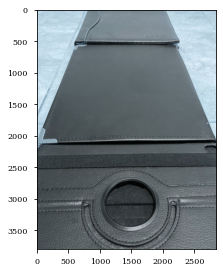

In [20]:
road = cv.imread('data/road.jpg')
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
plt.imshow(road)

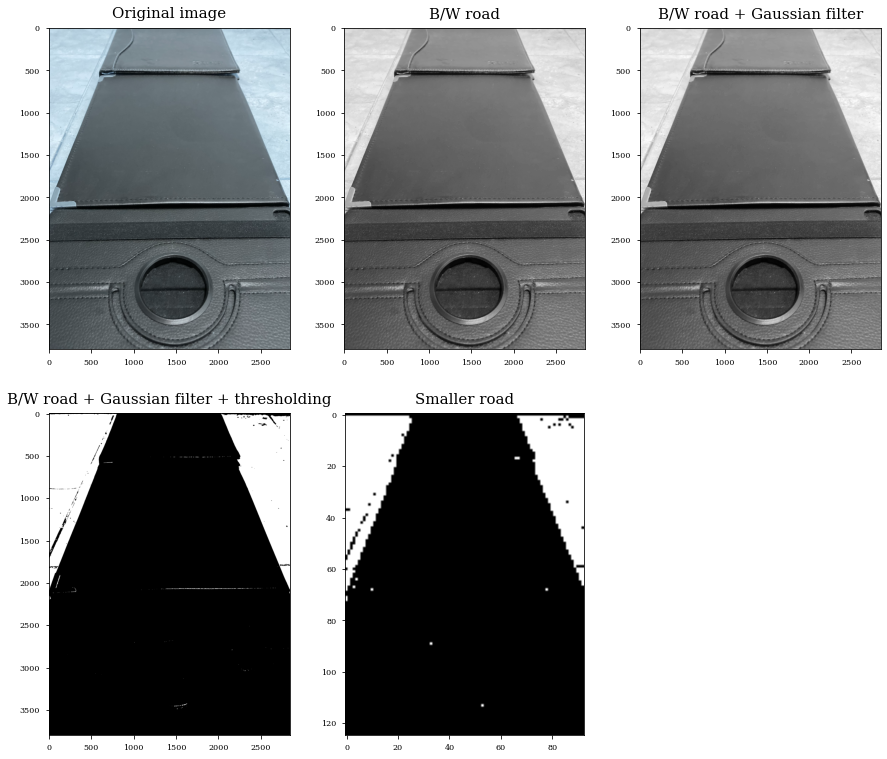

In [21]:
#load image
road = cv.imread('data/road.jpg')

#cambiar a escala de grises
road_gray = cv.cvtColor( src = road, code = cv.COLOR_BGR2GRAY )

#aplicar filtro gaussiano
road_gaussianBlur = cv.GaussianBlur( src = road_gray,
                                    ksize = (33,33),
                                    sigmaX = 1,
                                    sigmaY = 1
                                    )

#aplicar el thresholding
thr, road_thr = cv.threshold( road_gaussianBlur,
                             200, #Threshold
                             255, #maxval
                             cv.THRESH_BINARY #type of threshold
                             )
#change dimensions
ratio = 0.033
height, width = road_thr.shape

road_r = cv.resize( road_thr,
                   ( int(width*ratio), int(height*ratio) ),
                   interpolation = cv.INTER_NEAREST
                  )


plt.figure( figsize = (15,13), facecolor = '#FFFFFF' )
plt.axes().set_facecolor('#FFFFFF')

plt.subplot( 2, 3, 1 )
plt.title('Original image', size = 15, pad = 10)
plt.imshow( road )

plt.subplot( 2, 3, 2 )
plt.title('B/W road', size = 15, pad = 10)
plt.imshow( road_gray, cmap = 'gray' )

plt.subplot( 2, 3, 3 )
plt.title('B/W road + Gaussian filter', size = 15, pad = 10)
plt.imshow( road_gaussianBlur, cmap = 'gray' )

plt.subplot( 2, 3, 4 )
plt.title('B/W road + Gaussian filter + thresholding', size = 15, pad = 10)
plt.imshow( road_thr, cmap = 'gray' )

plt.subplot( 2, 3, 5 )
plt.title('Smaller road', size = 15, pad = 10)
plt.imshow( road_r, cmap = 'gray' )